In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta import trend
import matplotlib.pyplot as plt
import mplcursors
import math


In [2]:
data = yf.download("^NSEBANK", start="2023-01-01", end="2023-05-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100
2023-01-03,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000
2023-01-04,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800
2023-01-05,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100
2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100
...,...,...,...,...,...,...
2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000
2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400
2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000


In [4]:
df = data.reset_index()

In [5]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100
1,2023-01-03,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000
2,2023-01-04,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800
3,2023-01-05,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100
4,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100
...,...,...,...,...,...,...,...
74,2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000
75,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400
76,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000
77,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400


In [6]:
a=df['High'].max()

In [7]:
a

43578.3984375

In [8]:
b=df['Low'].min()

In [9]:
b

38613.1484375

In [10]:
#%K = [(Current Closing Price - Lowest Low) / (Highest High - Lowest Low)] * 100
list=[]

for i in range(79):
    close=df['Close'][i]
    low=df['Low'][i]
    high=df['High'][i]
    k=(close-low)/(high-low)
    list.append(k)
    
    
    


In [11]:
df['%K']=list

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,%K
0,2023-01-02,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100,0.573282
1,2023-01-03,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000,0.827873
2,2023-01-04,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,0.139149
3,2023-01-05,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,0.369626
4,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,0.385463
...,...,...,...,...,...,...,...,...
74,2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000,0.823842
75,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400,0.291611
76,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000,0.896914
77,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400,0.861319


In [13]:
df['SMA'] = trend.sma_indicator(df['%K'], window=3)

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,%K,SMA
0,2023-01-02,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100,0.573282,NaN
1,2023-01-03,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000,0.827873,NaN
2,2023-01-04,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,0.139149,0.513435
3,2023-01-05,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,0.369626,0.445549
4,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,0.385463,0.298079
...,...,...,...,...,...,...,...,...,...
74,2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000,0.823842,0.597054
75,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400,0.291611,0.495408
76,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000,0.896914,0.670789
77,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400,0.861319,0.683281


<Axes: xlabel='Date'>

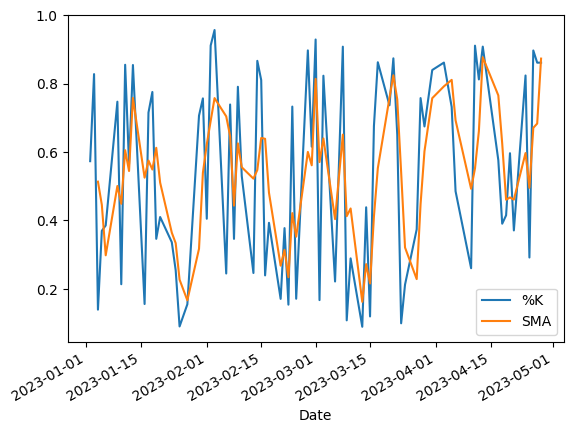

In [15]:
df.plot(x='Date',y=['%K','SMA'])

In [16]:
x=df['Date'].tolist()
y=df['Open'].tolist()

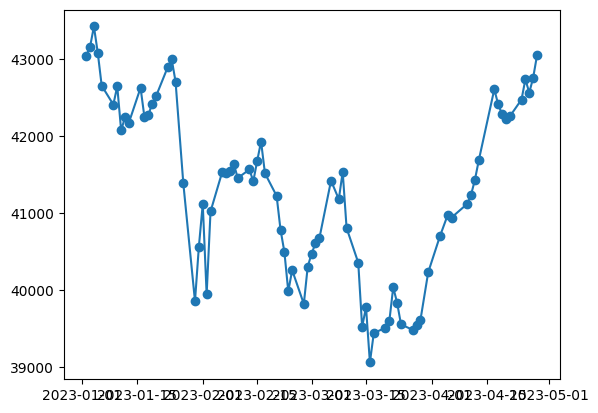

In [17]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o-')



In [18]:
cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"{sel.target[0]:.2f}, {sel.target[1]:.2f}"))



<function __main__.<lambda>(sel)>

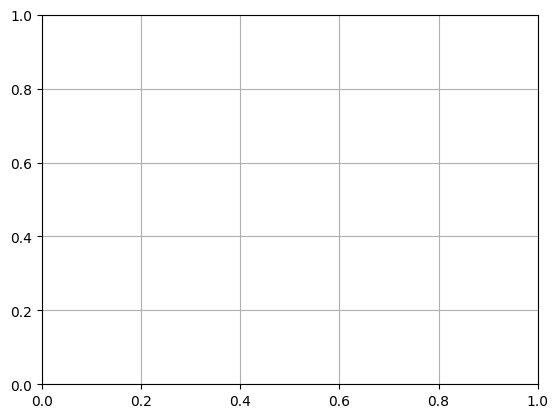

In [19]:
ax.set_xlabel('Date')
ax.set_ylabel('Stock price')
ax.set_title('Stock prices with time')
ax.set_xlim(x[0], x[-1])
ax.set_ylim(min(y), max(y))
ax.set_autoscale_on(False)
ax.format_coord = lambda x, y: f'({x:.2f}, {y:.2f})'
ax.set(xmargin=0.01, ymargin=0.1)
plt.gca().set_aspect('auto', adjustable='box')
plt.grid(True)



In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,%K,SMA
0,2023-01-02,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100,0.573282,NaN
1,2023-01-03,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000,0.827873,NaN
2,2023-01-04,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,0.139149,0.513435
3,2023-01-05,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,0.369626,0.445549
4,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,0.385463,0.298079
...,...,...,...,...,...,...,...,...,...
74,2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000,0.823842,0.597054
75,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400,0.291611,0.495408
76,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000,0.896914,0.670789
77,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400,0.861319,0.683281


In [21]:
#MF = [(Close - Low) - (High - Close)] / (High - Low)
#MFV = MF * Volume
ls=[]
Mfv=[]
Adl=0
adl=[]
for i in range(79):
    close=df['Close'][i]
    low=df['Low'][i]
    high=df['High'][i]
    k=((close-low)-(high-close))/(high-low)
    p=k*df['Volume'][i]
    adl.append(Adl)
    Adl+=p
    
    Mfv.append(p)
    ls.append(k)

df['MF']=ls
df['MFV']=Mfv
df['ADL']=adl
    
    

In [22]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,%K,SMA,MF,MFV,ADL
0,2023-01-02,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100,0.573282,NaN,0.146563,2.635357e+08,0.000000e+00
1,2023-01-03,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000,0.827873,NaN,0.655747,1.291821e+05,2.635357e+08
2,2023-01-04,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,0.139149,0.513435,-0.721702,-1.564651e+05,2.636649e+08
3,2023-01-05,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,0.369626,0.445549,-0.260747,-4.930735e+04,2.635084e+08
4,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,0.385463,0.298079,-0.229073,-4.469216e+04,2.634591e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
74,2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000,0.823842,0.597054,0.647685,1.301846e+05,2.645858e+08
75,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400,0.291611,0.495408,-0.416779,-1.093628e+05,2.647160e+08
76,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000,0.896914,0.670789,0.793829,1.413016e+05,2.646067e+08
77,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400,0.861319,0.683281,0.722638,1.310866e+05,2.647480e+08


<Axes: xlabel='Date'>

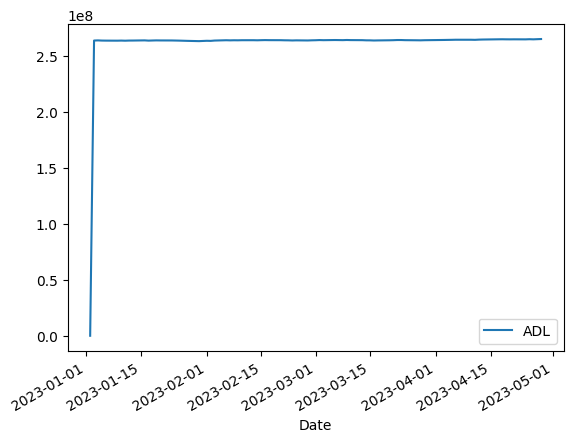

In [23]:
df.plot(x='Date',y='ADL')

[*********************100%***********************]  1 of 1 completed


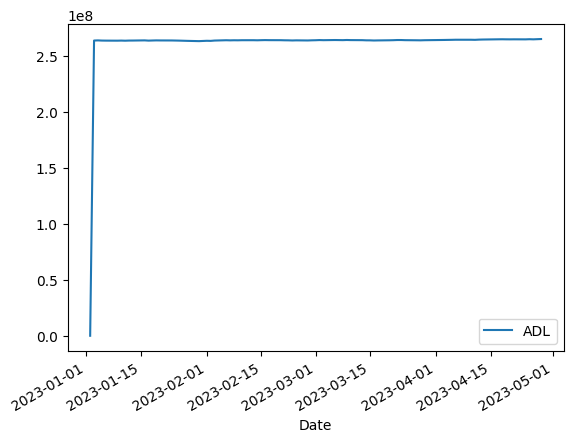

In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta import trend
import matplotlib.pyplot as plt
import mplcursors
data = yf.download("^NSEBANK", start="2023-01-01", end="2023-05-01")
df = data.reset_index()
#MF = [(Close - Low) - (High - Close)] / (High - Low)
#MFV = MF * Volume
ls=[]
Mfv=[]
Adl=0
adl=[]
for i in range(79):
    close=df['Close'][i]
    low=df['Low'][i]
    high=df['High'][i]
    k=((close-low)-(high-close))/(high-low)
    p=k*df['Volume'][i]
    adl.append(Adl)
    Adl+=p
    
    Mfv.append(p)
    ls.append(k)

df['MF']=ls
df['MFV']=Mfv
df['ADL']=adl
df.plot(x='Date',y='ADL')
plt.show()
    

In [27]:
lst=[0]

for i in range(79):
    if(i!=0):
        a=math.log(df['Close'][i]/df['Close'][i-1])
        lst.append(a)
    
    

In [28]:
df['IV']=lst

In [29]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MF,MFV,ADL,IV
0,2023-01-02,43038.250000,43382.750000,42961.750000,43203.101562,43203.101562,1798102100,0.146563,2.635357e+08,0.000000e+00,0.000000
1,2023-01-03,43151.449219,43482.800781,43148.449219,43425.250000,43425.250000,197000,0.655747,1.291821e+05,2.635357e+08,0.005129
2,2023-01-04,43417.500000,43578.398438,42858.648438,42958.800781,42958.800781,216800,-0.721702,-1.564651e+05,2.636649e+08,-0.010800
3,2023-01-05,43073.050781,43137.550781,42298.601562,42608.699219,42608.699219,189100,-0.260747,-4.930735e+04,2.635084e+08,-0.008183
4,2023-01-06,42649.699219,42685.898438,41877.000000,42188.800781,42188.800781,195100,-0.229073,-4.469216e+04,2.634591e+08,-0.009904
...,...,...,...,...,...,...,...,...,...,...,...
74,2023-04-24,42469.949219,42714.148438,42269.101562,42635.750000,42635.750000,201000,0.647685,1.301846e+05,2.645858e+08,0.012218
75,2023-04-25,42731.601562,42865.550781,42601.500000,42678.500000,42678.500000,262400,-0.416779,-1.093628e+05,2.647160e+08,0.001002
76,2023-04-26,42559.050781,42875.601562,42432.250000,42829.898438,42829.898438,178000,0.793829,1.413016e+05,2.646067e+08,0.003541
77,2023-04-27,42753.898438,43043.398438,42736.601562,43000.851562,43000.851562,181400,0.722638,1.310866e+05,2.647480e+08,0.003983


In [30]:
iv=df['IV'].tolist()

In [31]:
d=np.array(iv)

In [32]:
std=np.std(d)

In [33]:
std

0.009423726040511728